# Principal Component Analysis (PCA)
# 1. Definition
**PCA,** is a **dimensionality reduction** method that is often used to **reduce the dimensionality of large data sets,** *by transforming a large set of variables into a* **smaller one** that still contains most of the information in the large set.

**Thanks To:**
* [Optical Recognition of Handwritten Digits](https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits)
* [*sklearn.datasets*.**load_digits**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)
* [Recognizing hand-written digits](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)
* [PCA applied on handwritten digits using scikit-learn](https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/21820518-7e2f-4623-aa8a-b93dce24d826.xhtml)

The **PCA** example has been illustrated with the **handwritten digits** example from **scikit-learn** datasets, in which handwritten digits are created from **0-9** and its respective **64 features (8 x 8 matrix)** of pixel intensities. <br>
Here, the idea is to represent the original features of *64 dimensions into as few as possible:*

# 2. Import libraries

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
# import pandas as pd
import numpy as np

# 3. Load dataset

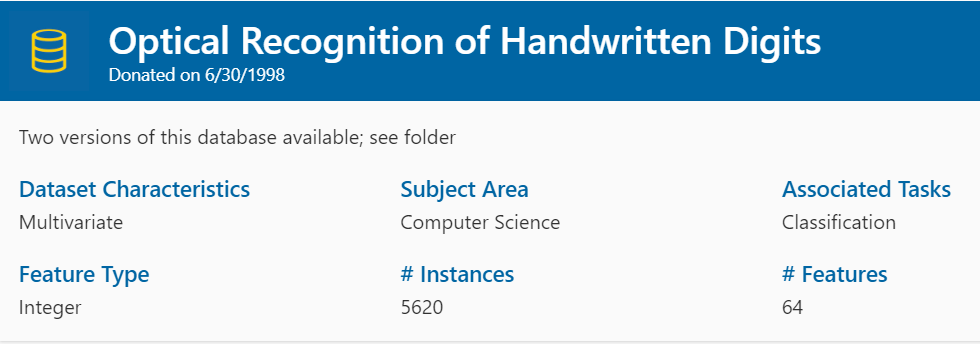


In [2]:
'''
df = pd.read_csv('optdigits.tra')
feature_names = ['class0', 'class1','class2','class3','class4','class5','class6','class7','class8','class9',]
# df = df.rename(columns=dict(zip(df.columns, feature_names)))
df = df(index=None)
df.head()
'''

"\ndf = pd.read_csv('optdigits.tra')\nfeature_names = ['class0', 'class1','class2','class3','class4','class5','class6','class7','class8','class9',]\n# df = df.rename(columns=dict(zip(df.columns, feature_names)))\ndf = df(index=None)\ndf.head()\n"

In [3]:
digits = load_digits()
print("\nlist all the attributes of digits dataset...\n")
dir(digits)


list all the attributes of digits dataset...



['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
# digits

In [5]:
print("\nprint all the feature's name (columns) of digit dataset...\n\n", digits.feature_names)


print all the feature's name (columns) of digit dataset...

 ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


# 4. Dataset EDA (Exploratory Data Analysis)

In [6]:
print("\nprint the index for Series and columns for DataFrame...\n\n", digits.keys())


print the index for Series and columns for DataFrame...

 dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [7]:
# shape matrix rows and columns of the images
print("\nprint the shape matrix (rows & columns) of the images dataset...\n\n",
digits.images.shape)


print the shape matrix (rows & columns) of the images dataset...

 (1797, 8, 8)


In [8]:
# feature names of digit dataset row index
print("\nprint the feature names of digit dataset row index...\n\n",
digits.feature_names[0:7])


print the feature names of digit dataset row index...

 ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6']


In [9]:
# number of features in the digit dataset
print("\nprint the number of features in the digit dataset...\n\n", len(digits.feature_names))


print the number of features in the digit dataset...

 64


In [10]:
# feature's length (number of instances) of the dataset
print("\nprint the feature's length (number of instances) of the digit dataset...\n\n",len(digits.data))


print the feature's length (number of instances) of the digit dataset...

 1797


In [11]:
# target's length of the dataset
print("\nprint the target's length of the digit dataset...\n\n",len(digits.target))


print the target's length of the digit dataset...

 1797


In [12]:
# shape matrix rows and columns of the dataset
print("\nprint the shape matrix (rows & columns) of the digit dataset...\n\n",
digits.data.shape)


print the shape matrix (rows & columns) of the digit dataset...

 (1797, 64)


In [13]:
# number of categories (multi-class) in the target
print("\nprint the number of categories (multi-class) in the target...\n\n",
len(np.unique(digits.target)))
# len(digits.target_names)


print the number of categories (multi-class) in the target...

 10


In [14]:
# different categories (multi-class) of the target
print("\nprint the different categories (multi-class) of the target...\n\n",
digits.target_names)


print the different categories (multi-class) of the target...

 [0 1 2 3 4 5 6 7 8 9]


# 5. Data Visualization

Visualize the **first 3 images** of hand written digit dataset. The **target attribute** of the digit dataset stores the **digit image** representations and this is included in the *title of the 3 plots below.*

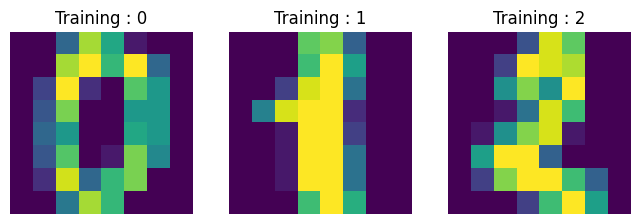

In [15]:
%matplotlib inline

_, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))
for axes, image, label in zip(axes, digits.images, digits.target):
    axes.set_axis_off()
    # axes.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    axes.imshow(image, cmap='viridis', interpolation='nearest')
    axes.set_title('Training : %i' % label)

In [16]:
# verify the first 3 target attribute from digit dataset
digits.target[:3]

array([0, 1, 2])

In [17]:
# the first 3 target attribute class from digit dataset
digits.target_names[digits.target[:3]]

array([0, 1, 2])

# 6. Data Preprocessing

## Flattening the 2-D array
The **digit dataset,** usually consists of images in a **2-D array format (e.g., 8x8 pixels).** Therefore, we need to **flatten the 2-D arrays into 1-D arrays (vectors).**
<br>
#### For instance, a **8x8 image** would be **flattened** into a **vector of size 64.**

In [18]:
digits.images.shape[0]

1797

In [19]:
# flatten the 2-D images of digit dataset into 1-D vector
data = digits.images.reshape((digits.images.shape[0], -1))
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

# 7. Data distribution into train and test dataset

In [20]:
from sklearn.model_selection import train_test_split

# split the digit dataset into training and test dataset.
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.25, random_state=0)

In [21]:
# length of independent training dataset variables
len(X_train)

1347

In [22]:
# length of dependent training dataset variables
len(X_test)

450

# 8. Model creation (PCA)

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

* The **StandardScaler** standardizes the features by removing the **mean** and **scaling** to *unit variance.*
* The **PCA reduces the dimensionality** of the data while preserving **95%** of the variance threshold.
* The **Pipeline** chains these two steps together, ensuring that they are applied in sequence.

## 8.1 Pipeline the dataset

In [24]:
# define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
])

## 8.2 Transform or fits the **Standard Scaler and PCA** to the dataset

In [25]:
# fit or train the pipeline model to the data
pipeline.fit(X_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95))])

In [26]:
X_train

array([[ 0.,  3., 13., ..., 12.,  9.,  1.],
       [ 0.,  0.,  1., ..., 13.,  1.,  0.],
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ..., 11.,  0.,  0.]])

In [27]:
# shape matrix (rows and columns) of original digit's dataset
X_train.shape

(1347, 64)

## 8.3 Standardized feature data using the mean and standard deviation

In [28]:
# standardized data using the mean and standard deviation during fitting.
X_train_std = pipeline.transform(X_train)

In [29]:
X_train_std

array([[-6.42680475, -1.23555744,  2.35458059, ...,  0.15312863,
         0.28039282,  0.30530294],
       [-1.31415521, -0.53623746, -0.52648056, ..., -0.43519227,
        -0.06796962,  0.50042848],
       [ 0.15077198, -0.09580081, -3.79913455, ..., -0.76171097,
         0.10324516,  0.39414103],
       ...,
       [ 0.12590602,  2.11017061,  2.03113845, ...,  0.40387314,
         0.03072384, -0.3023286 ],
       [ 1.30105706,  3.27698279,  0.35932241, ..., -0.59734317,
        -0.26260126,  0.63417782],
       [-1.7680216 , -0.39515574,  0.15165954, ...,  0.39711034,
         0.27610921,  0.14682779]])

In [30]:
# shape matrix (rows and columns) of digit's dataset after PCA implementation or deployment
X_train_std.shape

(1347, 40)